In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [5]:
# Load datasets
species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

# Merge datasets
data = pd.merge(observations, species_info, on='scientific_name', how='left')

# Fill missing conservation_status with 'No Concern'
data['conservation_status'] = data['conservation_status'].fillna('No Concern')

# Convert to categorical
data['category'] = data['category'].astype('category')
data['conservation_status'] = data['conservation_status'].astype('category')

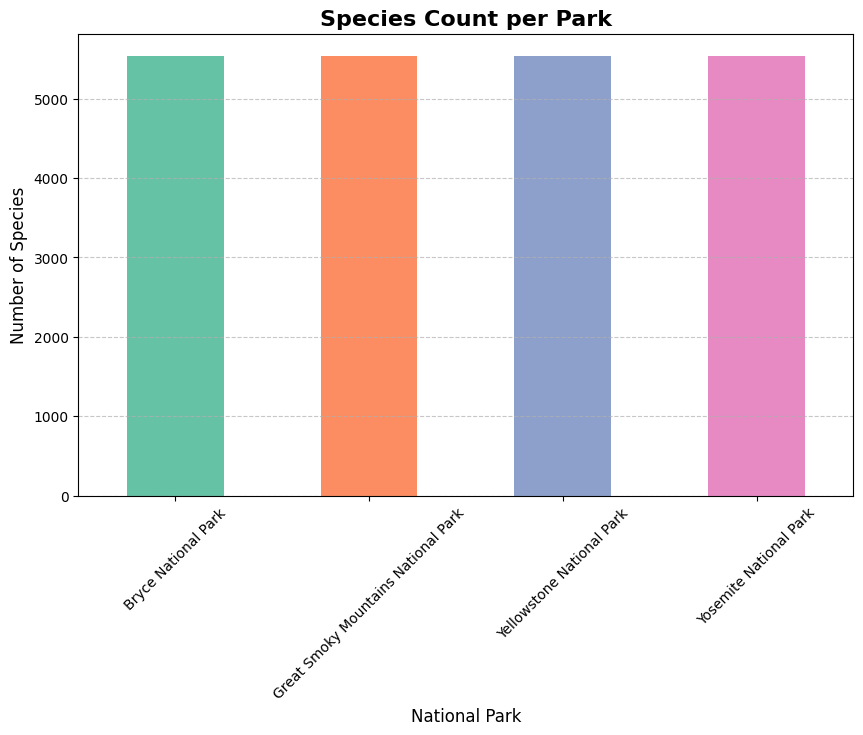

In [6]:
# Species count by park
species_count = data.groupby('park_name')['scientific_name'].nunique()

# Plot
plt.figure(figsize=(10, 6))
species_count.plot(kind='bar', color=sns.color_palette("Set2"))
plt.title('Species Count per Park', fontsize=16, fontweight='bold')
plt.xlabel('National Park', fontsize=12)
plt.ylabel('Number of Species', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-7-3ad873daa862>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_obs = data.groupby('category')['observations'].sum().sort_values()


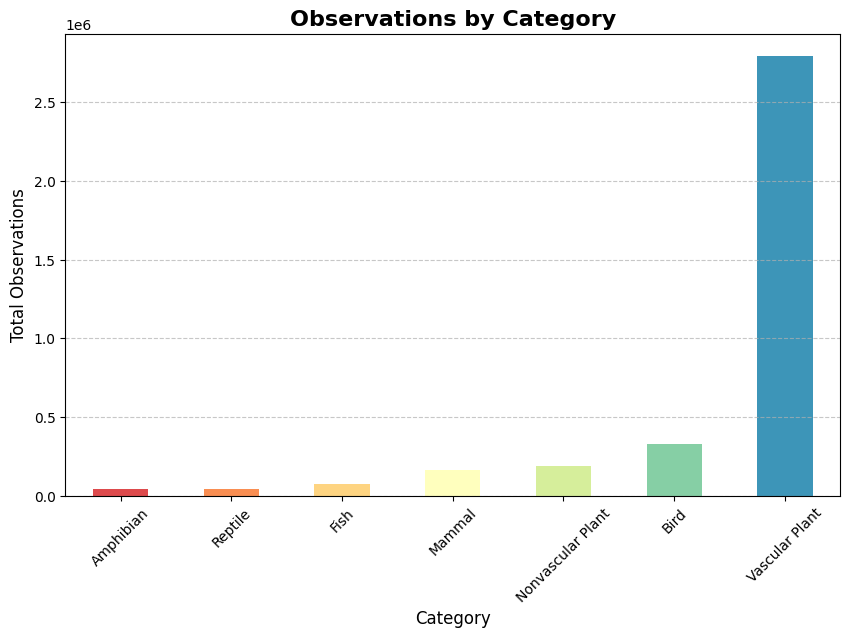

In [7]:
# Observations grouped by category
category_obs = data.groupby('category')['observations'].sum().sort_values()

# Plot
plt.figure(figsize=(10, 6))
category_obs.plot(kind='bar', color=sns.color_palette("Spectral", n_colors=len(category_obs)))
plt.title('Observations by Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Observations', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

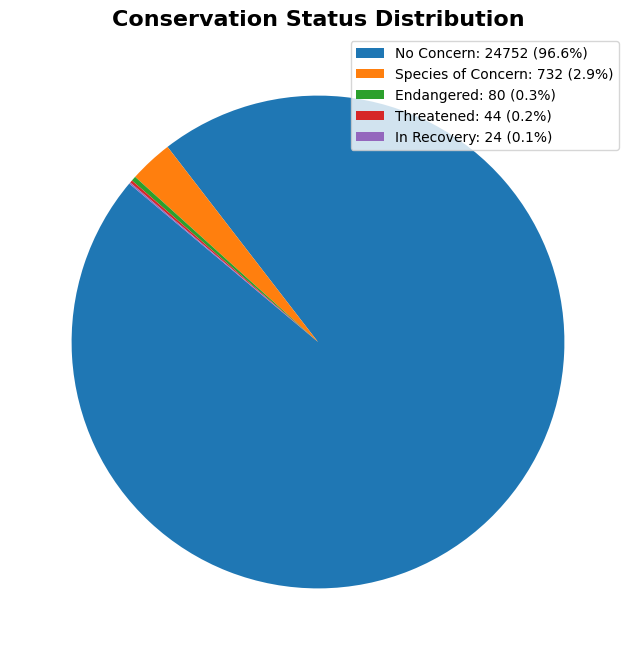

In [22]:
# Conservation status counts
conservation_counts = data['conservation_status'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette("tab10", n_colors=len(conservation_counts))
wedges, texts = plt.pie(
    conservation_counts,
    startangle=140,
    colors=colors,
    pctdistance=0.99
)

# Create a legend for conservation status with percentages
plt.legend(
    labels=[f"{status}: {count} ({percent:.1f}%)" for status, count, percent in zip(
        conservation_counts.index, conservation_counts,
        (conservation_counts / conservation_counts.sum()) * 100
    )],
    loc="best",
    fontsize=10
)

plt.title('Conservation Status Distribution', fontsize=16, fontweight='bold')
plt.show()


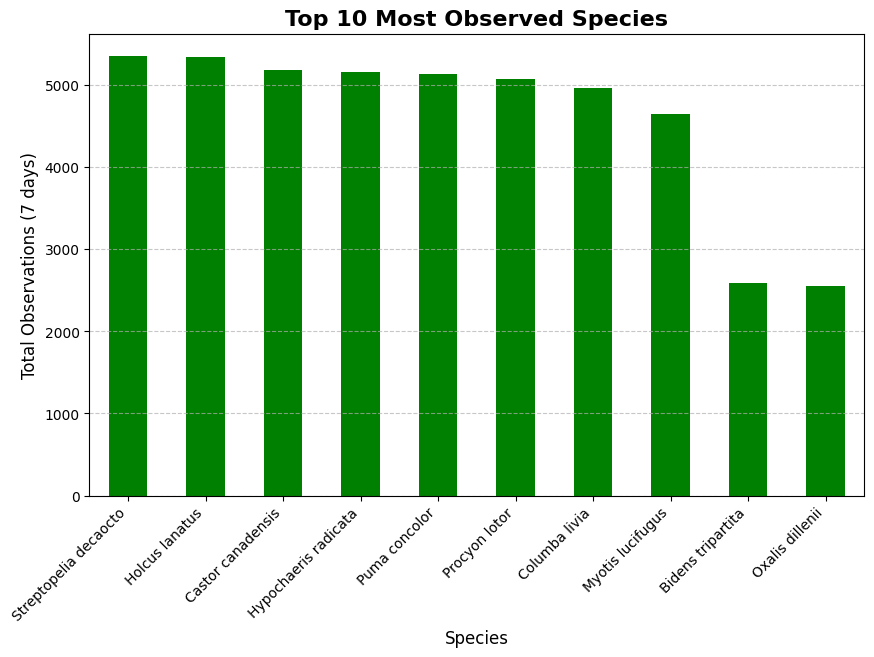

In [12]:
# Top 10 species by observations
top_species = data.groupby('scientific_name')['observations'].sum().nlargest(10)

# Bar plot
plt.figure(figsize=(10, 6))
top_species.plot(kind='bar', color='green')
plt.title('Top 10 Most Observed Species', fontsize=16, fontweight='bold')
plt.xlabel('Species', fontsize=12)
plt.ylabel('Total Observations (7 days)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

To measure species diversity in each park

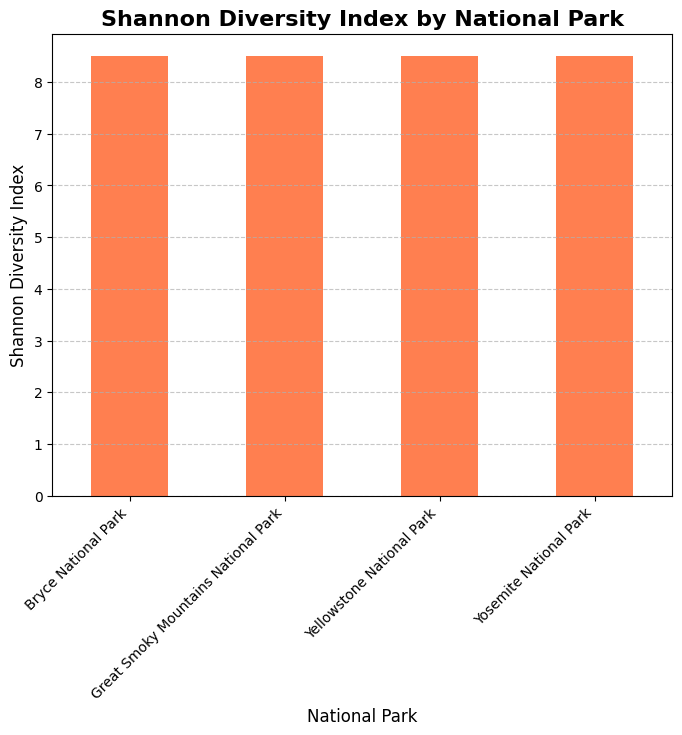

In [15]:
from scipy.stats import entropy

# Shannon Index for each park
def shannon_index(group):
    proportions = group / group.sum()
    return entropy(proportions)

species_counts_by_park = data.groupby(['park_name', 'scientific_name']).size().unstack(fill_value=0)
shannon_indices = species_counts_by_park.apply(shannon_index, axis=1)

# Bar plot of diversity index
shannon_indices.sort_values().plot(kind='bar', figsize=(8, 6), color='coral')
plt.title('Shannon Diversity Index by National Park', fontsize=16, fontweight='bold')
plt.xlabel('National Park', fontsize=12)
plt.ylabel('Shannon Diversity Index', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

To identify how conservation statuses vary across parks.

<ipython-input-14-8edae4924d1f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conservation_by_park = data.groupby(['park_name', 'conservation_status']).size().unstack(fill_value=0)


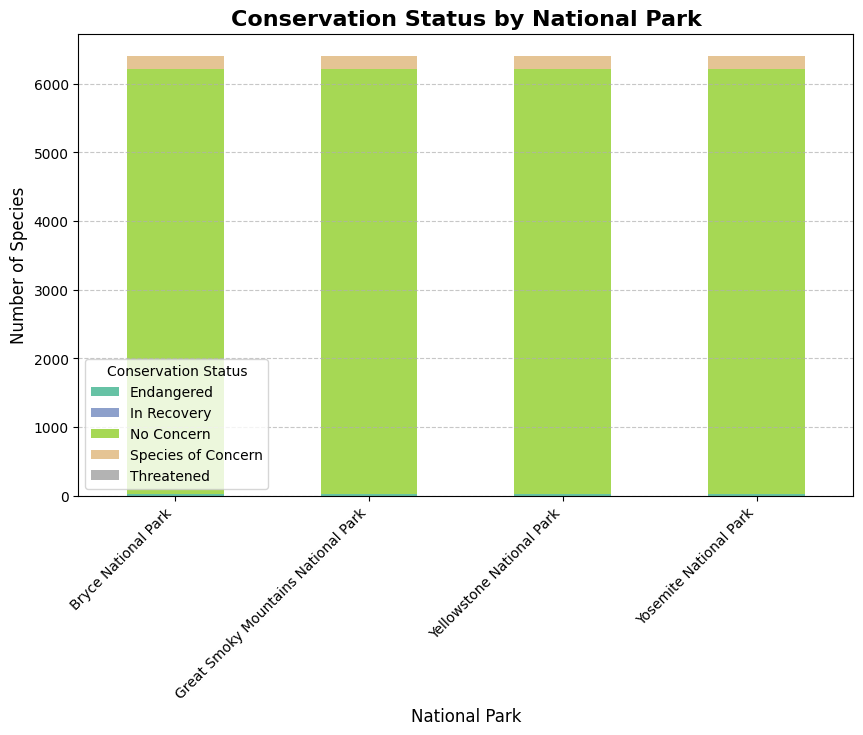

In [14]:
# Conservation status by park
conservation_by_park = data.groupby(['park_name', 'conservation_status']).size().unstack(fill_value=0)

# Stacked bar plot
conservation_by_park.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='Set2')
plt.title('Conservation Status by National Park', fontsize=16, fontweight='bold')
plt.xlabel('National Park', fontsize=12)
plt.ylabel('Number of Species', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Conservation Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Understanding which parks have more species diversity or observations.

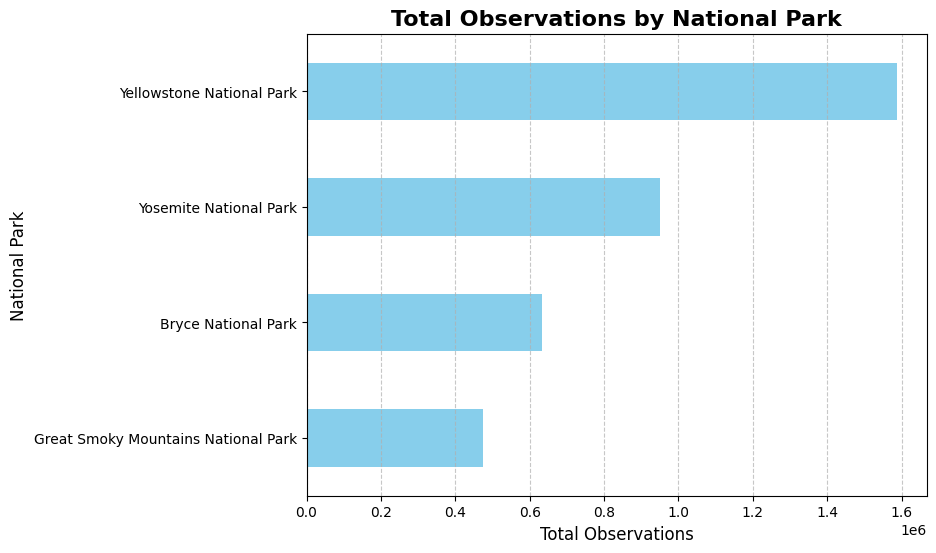

In [13]:
# Observations by park
observations_by_park = data.groupby('park_name')['observations'].sum()

# Horizontal bar plot
plt.figure(figsize=(8, 6))
observations_by_park.sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Observations by National Park', fontsize=16, fontweight='bold')
plt.xlabel('Total Observations', fontsize=12)
plt.ylabel('National Park', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-9-59e8746a94c8>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = data.pivot_table(index='park_name', columns='conservation_status', values='observations', aggfunc='sum')


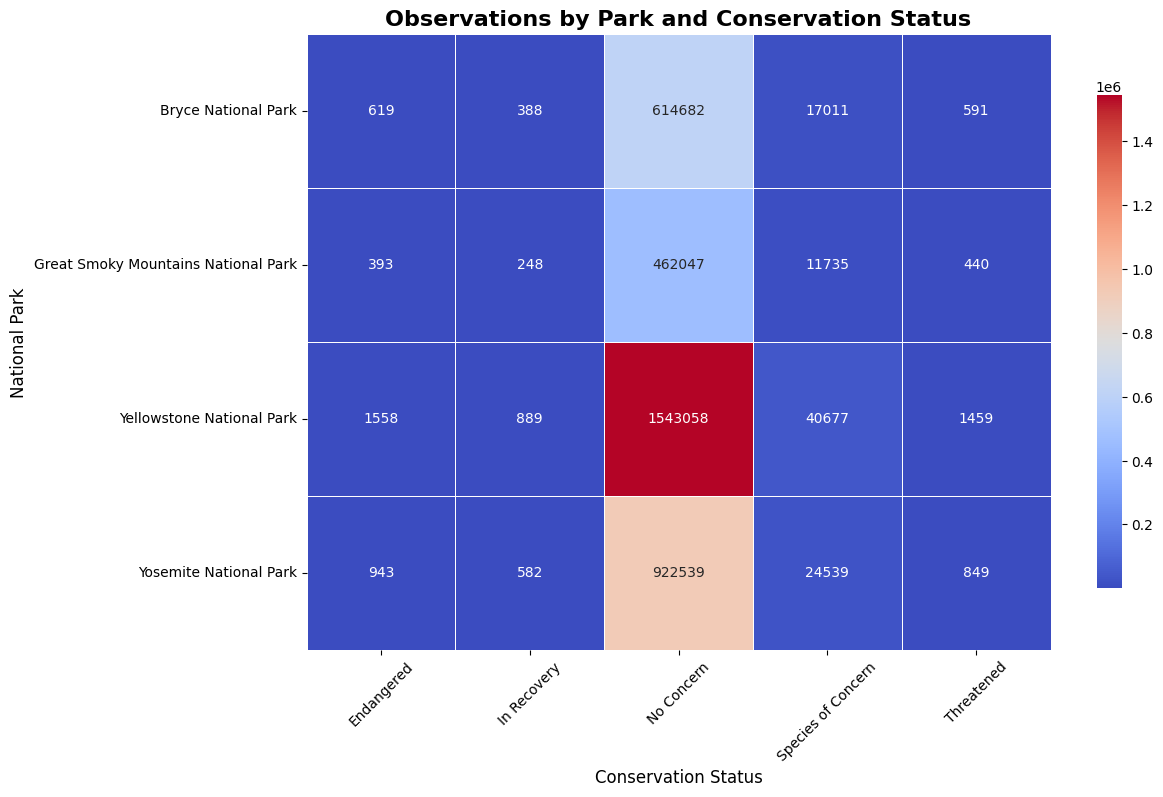

In [9]:
# Prepare data for heatmap
heatmap_data = data.pivot_table(index='park_name', columns='conservation_status', values='observations', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, annot=True, fmt='.0f', cmap='coolwarm', linewidths=0.5, cbar_kws={'shrink': 0.8}
)
plt.title('Observations by Park and Conservation Status', fontsize=16, fontweight='bold')
plt.xlabel('Conservation Status', fontsize=12)
plt.ylabel('National Park', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()


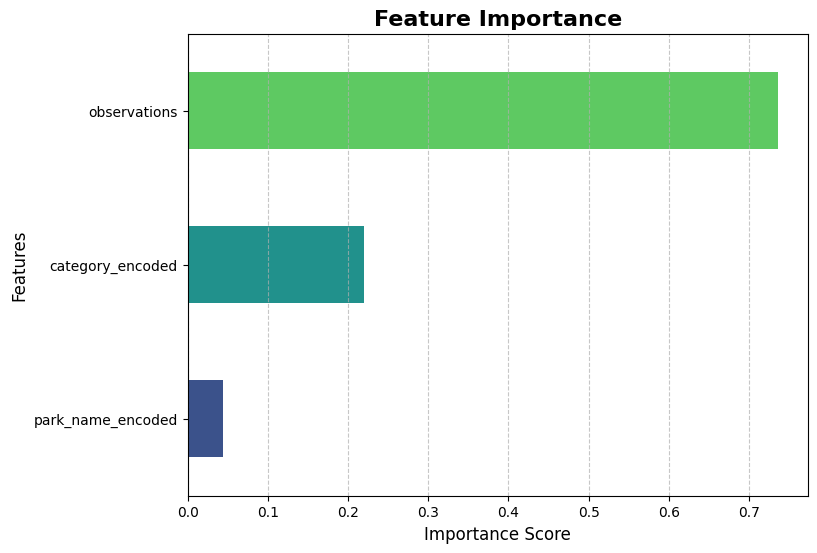

In [10]:
# Encode categorical variables
le = LabelEncoder()
data['category_encoded'] = le.fit_transform(data['category'])
data['park_name_encoded'] = le.fit_transform(data['park_name'])

# Features and target
X = data[['observations', 'category_encoded', 'park_name_encoded']]
y = le.fit_transform(data['conservation_status'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)

# Plot feature importance
plt.figure(figsize=(8, 6))
importances.sort_values().plot(kind='barh', color=sns.color_palette("viridis", n_colors=len(importances)))
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
